In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Read dataset

In [2]:
data = pd.read_csv("data/SMS.tsv", delimiter="\t")
data

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Remove accents

In [3]:
from sklearn.feature_extraction.text import strip_accents_ascii

data.text = data.text.apply(lambda msg: strip_accents_ascii(msg))
data

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will u b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Remove html/xml tags

In [4]:
from sklearn.feature_extraction.text import strip_tags

data.text = data.text.apply(lambda msg: strip_tags(msg))
data

,class,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will u b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...


### Remove chars except ascii letters and whitespaces

In [5]:
from string import ascii_letters, whitespace

allowed = ascii_letters + whitespace
data.text = data.text.apply(lambda msg: ''.join(filter(lambda c: c in allowed, msg)))
data

,class,text
0,ham,Go until jurong point crazy Available only in ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry in a wkly comp to win FA Cup final...
3,ham,U dun say so early hor U c already then say
4,ham,Nah I dont think he goes to usf he lives aroun...
...,...,...
5567,spam,This is the nd time we have tried contact u U...
5568,ham,Will u b going to esplanade fr home
5569,ham,Pity was in mood for that Soany other suggest...
5570,ham,The guy did some bitching but I acted like id ...


### Remove stopwords

In [6]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/{some_user}/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [7]:
from nltk.corpus import stopwords

sw = stopwords.words("english") + stopwords.words("chinese")
data.text = data.text.apply(lambda msg: ' '.join(filter(lambda word: word not in sw, msg.split(" "))))
data

,class,text
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry wkly comp win FA Cup final tkts st...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think goes usf lives around though
...,...,...
5567,spam,This nd time tried contact u U Pound prize ...
5568,ham,Will u b going esplanade fr home
5569,ham,Pity mood Soany suggestions
5570,ham,The guy bitching I acted like id interested bu...


### Remove repeated whitespaces

In [8]:
import re

data.text = data.text.apply(lambda msg: re.sub("\s+", " ", msg).strip())
data

,class,text
0,ham,Go jurong point crazy Available bugis n great ...
1,ham,Ok lar Joking wif u oni
2,spam,Free entry wkly comp win FA Cup final tkts st ...
3,ham,U dun say early hor U c already say
4,ham,Nah I dont think goes usf lives around though
...,...,...
5567,spam,This nd time tried contact u U Pound prize cla...
5568,ham,Will u b going esplanade fr home
5569,ham,Pity mood Soany suggestions
5570,ham,The guy bitching I acted like id interested bu...


In [9]:
marks = data["class"].apply(lambda c: 1 if c == "spam" else 0)

### Feature extraction

TfidfVectorizer and CountVectorizer. Evaluate some metrics to choose the best one.

### TF-IDF

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
sparse_matrix = tfidf.fit_transform(data.text)

preprocessed = pd.DataFrame(data=sparse_matrix.toarray())

### Is it well separable?

In [44]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.metrics import silhouette_score

def scatter(raw, embeds, marks=marks):
    plt.figure(figsize=(15, 5))
    plt.scatter(embeds[:, 0], embeds[:, 1], c=marks, s=30, marker="x")
    print("Silhouette score:", silhouette_score(raw, marks))

Silhouette score: 0.0033676783117044386


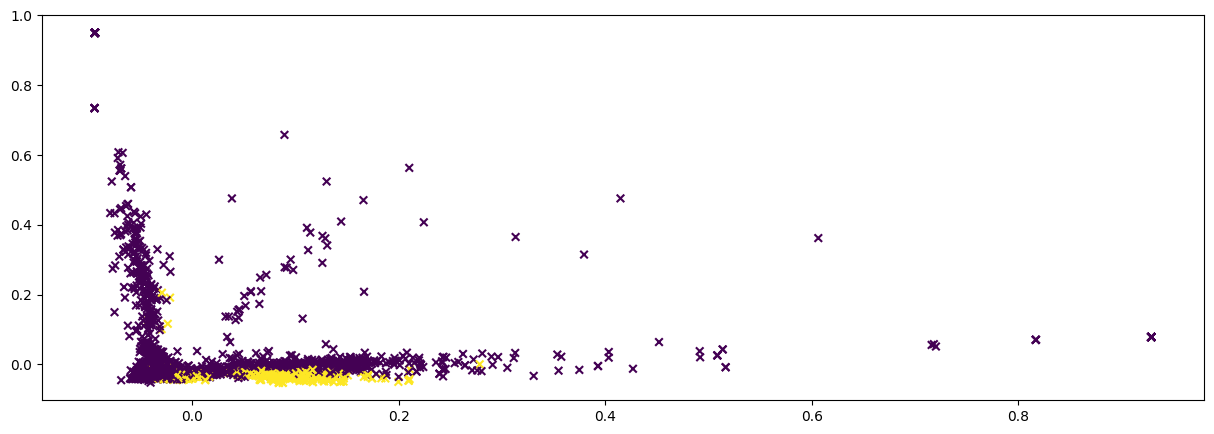

In [45]:
scatter(preprocessed, PCA(n_components=2).fit_transform(preprocessed))

### Count

In [13]:
from sklearn.feature_extraction.text import CountVectorizer

cnt = CountVectorizer()
sparse_matrix = cnt.fit_transform(data.text)

preprocessed2 = pd.DataFrame(data=sparse_matrix.toarray())

Silhouette score: 0.1362277699839478


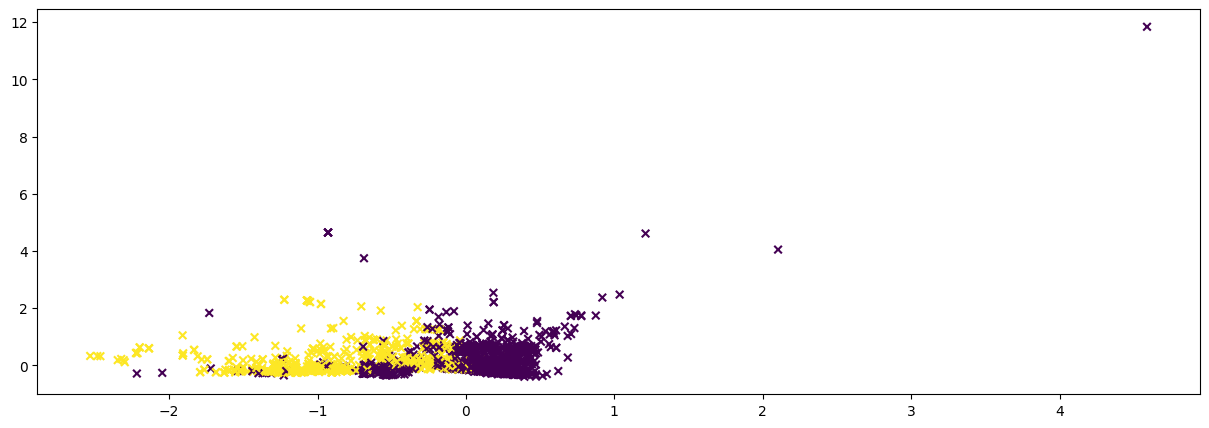

In [46]:
scatter(preprocessed2, PCA(n_components=2).fit_transform(preprocessed2))

### OK, then use CountVectorizer

In [15]:
preprocessed2.shape

(5572, 8590)

In [16]:
# map numbers of feature to certain words
int2word = {i: word for word, i in cnt.vocabulary_.items()}

## Feature selection

We gonna use embedded, filter and wrapper methods.

### Embedded method (random forest)

In [17]:
import selection, importlib
importlib.reload(selection);
from selection import *

In [18]:
top100_1 = get_top_features_df(embedded_method(preprocessed2, marks))

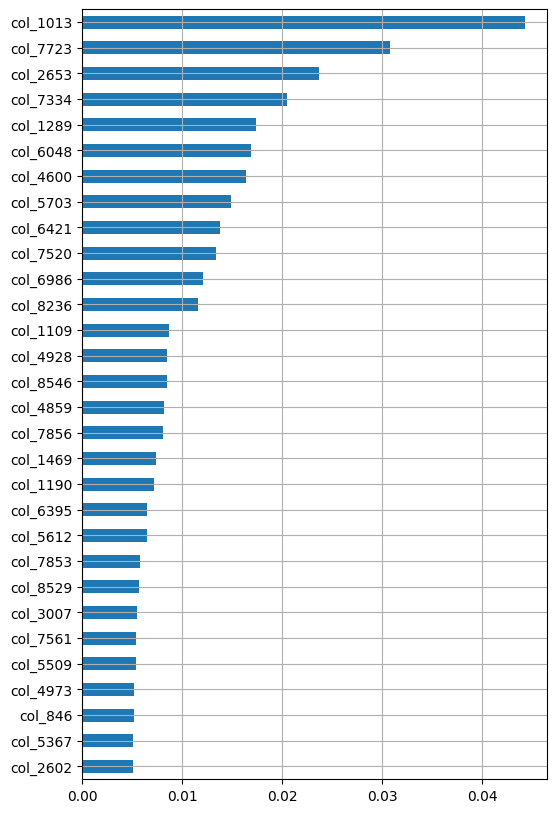

In [19]:
plot_top_feature_scores(top100_1)

In [20]:
top30_words_1 = get_top_words(int2word, top100_1)
for i in top30_words_1:
    print(i)

call
txt
free
text
claim
reply
mobile
prize
service
to
stop
win
cash
nokia
your
new
urgent
contact
chat
send
ppm
ur
you
guaranteed
tone
pmin
now
box
per
for


### Filter method

In [21]:
top100_2 = get_top_features_df(filter_method(preprocessed2, marks))

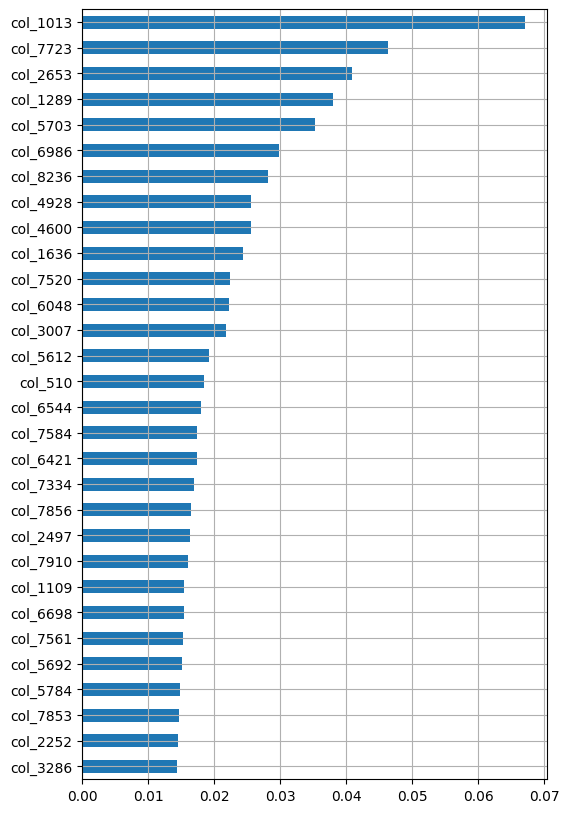

In [22]:
plot_top_feature_scores(top100_2)

In [23]:
top30_words_2 = get_top_words(int2word, top100_2)
for i in top30_words_2:
    print(i)

call
txt
free
claim
prize
stop
win
nokia
mobile
customer
to
reply
guaranteed
ppm
awarded
shows
toothpaste
service
text
urgent
final
valid
cash
sms
tone
print
pubcafe
ur
eruku
honi


### Wrapper method (greedy & randomized)

In [24]:
top100_3 = get_top_features_df(wrapper_method(preprocessed2, marks))

100%|██████████| 100/100 [05:03<00:00,  3.04s/it]


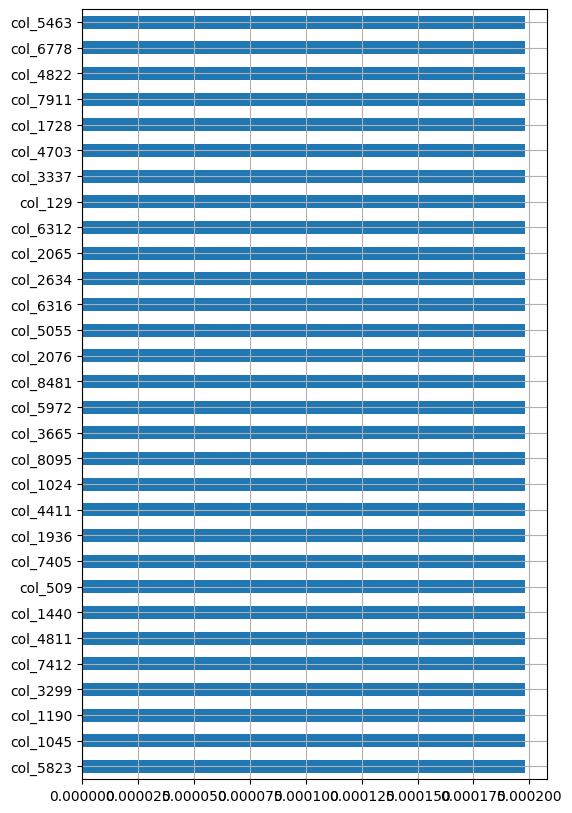

In [25]:
# uniformly distributed, because no way to calculate real importance
plot_top_feature_scores(top100_3)

In [26]:
top30_words_3 = get_top_words(int2word, top100_3)
for i in top30_words_3:
    print(i)

qi
necklace
validhrs
dealer
msgs
hows
afternoon
scared
drunk
four
sch
offers
duchess
yar
redred
jada
waxsto
callin
mayb
divert
they
award
conditions
nd
thing
hopefully
chat
cam
sorry
place


### top-30 words of my methods

In [27]:
summary = pd.DataFrame(data={
    "embedded method": top30_words_1,
    "filter method": top30_words_2,
    "wrapper method": top30_words_3,
})
summary

,embedded method,filter method,wrapper method
0,call,call,qi
1,txt,txt,necklace
2,free,free,validhrs
3,text,claim,dealer
4,claim,prize,msgs
5,reply,stop,hows
6,mobile,win,afternoon
7,prize,nokia,scared
8,service,mobile,drunk
9,to,customer,four


### sklearn's embedded method

In [28]:
top100_4 = get_top_features_df(embedded_method_sklearn(preprocessed2, marks))

In [29]:
top30_words_4 = get_top_words(int2word, top100_4)

### sklearn's filter method

In [30]:
top100_5 = get_top_features_df(filter_method_sklearn(preprocessed2, marks))

In [31]:
top30_words_5 = get_top_words(int2word, top100_5)

### sklearn's wrapper method

In [32]:
top100_6 = get_top_features_df(wrapper_method_sklearn(preprocessed2, marks))

In [33]:
top30_words_6 = get_top_words(int2word, top100_6)

### Top-30 important words

In [34]:
pd.DataFrame(data={
    "our embedded method": top30_words_1,
    "sklearn embedded method": top30_words_4,
    "our filter method": top30_words_2,
    "sklearn filter method": top30_words_5,
    "our wrapper method": top30_words_3,
    "sklearn wrapper method": top30_words_6,
})

,our embedded method,sklearn embedded method,our filter method,sklearn filter method,our wrapper method,sklearn wrapper method
0,call,txt,call,call,qi,want
1,txt,claim,txt,txt,necklace,draw
2,free,service,free,free,validhrs,pmin
3,text,win,claim,claim,dealer,customer
4,claim,mobile,prize,mobile,msgs,call
5,reply,pmsg,stop,prize,hows,enjoy
6,mobile,urgent,win,stop,afternoon,ringtoneking
7,prize,ringtone,nokia,to,scared,now
8,service,stop,mobile,urgent,drunk,urgent
9,to,text,customer,text,four,sms


### Classification comparison

In [35]:
%%time
raw = do_classification(preprocessed2, marks)

CPU times: user 48.9 ms, sys: 204 ms, total: 253 ms
Wall time: 13.6 s


In [40]:
%%time
our_embedded_method, sklearn_embedded_method = do_cmp_classification(preprocessed2, marks, top100_1, top100_4)

CPU times: user 33.4 ms, sys: 21.1 ms, total: 54.4 ms
Wall time: 1.43 s


In [37]:
%%time
our_filter_method, sklearn_filter_method = do_cmp_classification(preprocessed2, marks, top100_2, top100_5)

CPU times: user 31.8 ms, sys: 19.4 ms, total: 51.2 ms
Wall time: 1.39 s


In [38]:
%%time
our_wrapper_method, sklearn_wrapper_method = do_cmp_classification(preprocessed2, marks, top100_3, top100_6)

CPU times: user 31.7 ms, sys: 19 ms, total: 50.8 ms
Wall time: 1.44 s


In [39]:
pd.DataFrame(data={
    "all features": raw,
    "our embedded method": our_embedded_method,
    "sklearn embedded method": sklearn_embedded_method,
    "our filter method": our_filter_method,
    "sklearn filter method": sklearn_filter_method,
    "our wrapper method": our_wrapper_method,
    "sklearn wrapper method": sklearn_wrapper_method,
}, index=["Random forest", "SVC", "KNN"])

,all features,our embedded method,sklearn embedded method,our filter method,sklearn filter method,our wrapper method,sklearn wrapper method
Random forest,0.984722,0.962203,0.960164,0.930846,0.951055,0.880202,0.974365
SVC,0.985938,0.975928,0.977546,0.943468,0.964366,0.876005,0.979735
KNN,0.834368,0.891409,0.848091,0.893748,0.891376,0.838104,0.902889


### Winner - sklearn wrapper method a.k.a RFE over Random Forest Classifier

also KNN does better after sklearn wrapper method.